# Leti jadralnih letal

Za projekt pri predmetu Programiranje 1 bom analizirala lete jadralnih letal. Podatke sem dobila na strani [Online Contest](https://www.onlinecontest.org/olc-2.0/gliding/airfieldRanking.html?st=olc-league&rt=olc&c=SI&sc=&sp=2017), kjer sem zajela vse lete, ki so se začeli na slovenskih letališčih v sezoni 2017.

## Zajeti podatki

- datum
- točke
- ime pilota
- država pilota
- dolžina leta
- hitrost
- klub
- letalo
- vzlet
- pristanek
- letališče

## Analiza

In [117]:
import pandas as pd
import numpy as  np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

pd.options.display.max_rows = 20

leti = pd.read_csv('leti.csv')
leti['Datum'] = pd.to_datetime(leti['Datum'], dayfirst=True)

# leti.set_index(leti.Datum, inplace=True)

Najprej si oglejmo podatke.

In [97]:
leti

,Datum,Točke,Ime,Država,Dolžina [km],Hitrost [km/h],Klub,Letalo,Vzlet,Pristanek,Letališče
0,2017-08-31,115.55,Jure Sirok,SI,81.30,51.24,AK Edvard Rusjan,L 13 Blanik,11:55,13:41,Ajdovščina
1,2017-08-15,175.14,Sandi Stanic,SI,163.82,62.43,AK Edvard Rusjan,SZD 55,13:05,15:51,Ajdovščina
2,2017-08-15,150.70,Aljaž Ogrin,SI,102.85,43.90,AK Josip Krizaj Ajdovscina,L 23 Super Blanik,11:54,14:39,Ajdovščina
3,2017-08-15,147.97,Darjo Gregoric,SI,116.64,55.02,AK Edvard Rusjan,Twin Astir RG,12:33,15:14,Ajdovščina
4,2017-08-01,152.25,Aljaž Ogrin,SI,104.78,48.42,AK Josip Krizaj Ajdovscina,L 13 Blanik,11:51,14:34,Ajdovščina
5,2017-07-28,0.00,Aljaž Ogrin,SI,218.66,48.81,AK Josip Krizaj Ajdovscina,DG 100,10:57,15:38,Ajdovščina
6,2017-07-19,0.00,Aljaž Ogrin,SI,171.02,52.66,AK Josip Krizaj Ajdovscina,DG 100,10:59,14:53,Ajdovščina
7,2017-07-08,0.00,Aljaž Ogrin,SI,69.19,39.54,AK Josip Krizaj Ajdovscina,DG 100,13:15,15:33,Ajdovščina
8,2017-07-05,0.00,Jure Sirok,SI,71.41,28.29,AK Edvard Rusjan,L 13 Blanik,11:14,14:13,Ajdovščina
9,2017-07-05,0.00,Črtomir Pavlin,SI,118.22,38.79,AK Edvard Rusjan,Twin Astir RG,11:29,14:52,Ajdovščina


In [87]:
leti.groupby('Datum').size().sort_values(ascending=False)

Datum
2017-04-09    44
2017-04-30    42
2017-04-10    41
2017-06-11    24
2017-05-06    23
2017-04-14    22
2017-04-02    20
2017-04-01    19
2017-04-08    19
2017-05-27    19
              ..
2017-03-30     1
2017-07-30     1
2017-07-27     1
2017-07-02     1
2017-06-22     1
2017-06-01     1
2017-05-31     1
2017-04-16     1
2017-05-29     1
2017-03-23     1
Length: 129, dtype: int64

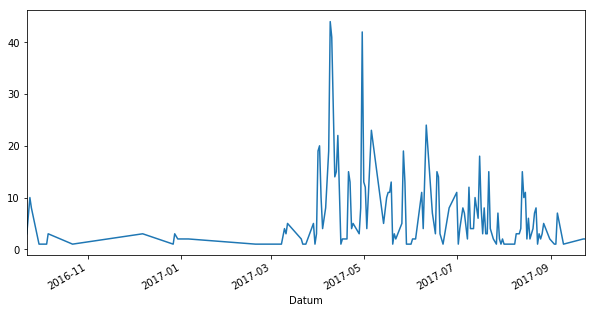

In [74]:
leti.groupby('Datum').size().plot(figsize=(10,5))

Vidimo, da je bilo v sezoni 2017 129 dni primernih za letenje. Od teh so bili najbolj popularni tisti med aprilom in septembrom.

In [99]:
leti.groupby('Država').size().sort_values(ascending=False)

Država
SI    627
DE    224
IT     17
PL      8
AT      4
dtype: int64

Opazimo, da pri nas leti presenetljivo veliko Nemcev, medtem ko pilotov iz sosednjih držav skoraj ni.

In [107]:
leti_tujih_pilotov = leti[leti.Država != 'SI']

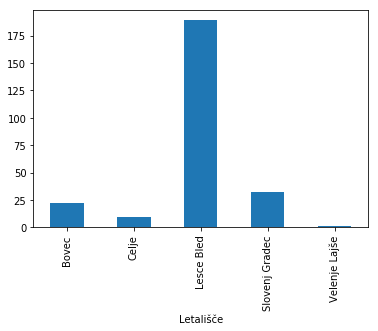

In [116]:
leti_tujih_pilotov.groupby('Letališče').size().plot(kind='bar')

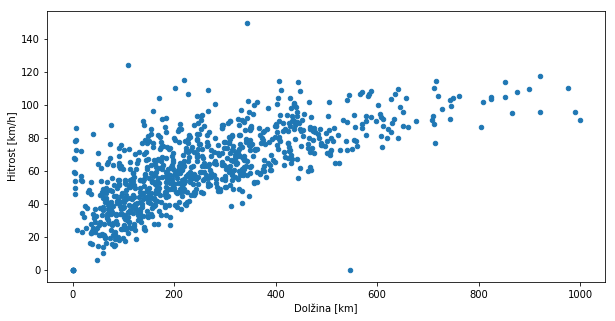

In [100]:
leti.sort_values('Dolžina [km]', ascending=True).plot(figsize=(10,5), x='Dolžina [km]', y='Hitrost [km/h]', kind='scatter')

In [63]:
leti.groupby('Datum')['Dolžina [km]'].mean().sort_values(ascending=False)

Datum
2017-04-20    711.640000
2017-04-06    587.958750
2017-07-06    578.022857
2017-05-26    485.500000
2017-04-03    480.322000
2017-04-01    473.179474
2017-03-21    447.955000
2017-03-31    439.993333
2017-01-06    437.910000
2017-03-29    421.234000
                 ...    
2017-06-22     60.440000
2016-12-27     59.170000
2017-06-01     57.580000
2017-05-29     57.300000
2017-07-29     50.690000
2017-06-04     47.610000
2017-06-09     38.575000
2017-07-09     35.247500
2016-12-07      0.000000
2017-03-22      0.000000
Name: Dolžina [km], Length: 129, dtype: float64

In [98]:
leti[['Dolžina [km]', 'Letališče']].sort_values('Dolžina [km]', ascending=False)

,Dolžina [km],Letališče
815,999.45,Ptuj Moškanjci
259,989.71,Lesce Bled
455,975.72,Lesce Bled
451,921.17,Lesce Bled
459,920.86,Lesce Bled
224,898.99,Lesce Bled
470,875.17,Lesce Bled
254,866.40,Lesce Bled
265,852.73,Lesce Bled
264,851.50,Lesce Bled


In [125]:
leti.groupby('Ime').size().sort_values(ascending=False)[:20]

Ime
Dejan Filipič      21
Borut Mlakar       19
Matija Kodric      18
Luka Hojnik        17
Tone Cerin         17
Matjaz Zupan       17
Roman Orešnik      16
Milan Ota          16
Iztok Zagar        15
Darko Pavlovič     13
Denis Škrabl       13
Marjan Jancic      13
Boris Zorz         12
Gregor Urbancic    12
Andrej Spudič      11
Robi Slaus         11
Damijan Korpič     11
Stjepan Količ      10
Jernej Lokovsek    10
Robin Sittmann      9
dtype: int64